In [5]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import *
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

sb.set()
data = pd.read_csv("preprocessed.csv", index_col="id")

In [6]:

from sklearn.model_selection import train_test_split

X = data.drop([
    "cardio",
    # "alco",
    # "smoke",
    # "active", 
    # "age", 
    # "bmi", 
    # "gluc_Normal", 
    # "gluc_Well Above Normal", 
    # "gluc_Above Normal", 
    # "cholesterol_Above Normal", 
    # "cholesterol_Normal", 
    # "cholesterol_Well Above Normal",
    # "ap_hi"
], axis=1)

y = data.filter(["cardio"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train


,age,bmi,ap_lo,ap_hi,gluc_Above Normal,gluc_Normal,gluc_Well Above Normal,gender_Female,gender_Male,cholesterol_Above Normal,cholesterol_Normal,cholesterol_Well Above Normal,smoke,alco,active
id,,,,,,,,,,,,,,,
52223,-1.946659,-0.600147,-0.134931,-0.356915,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
27983,1.595150,0.018972,-0.134931,0.207365,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1
16179,-0.575636,-0.647310,-0.134931,-0.921194,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1
50470,-0.157523,-0.442164,-0.134931,1.335923,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1
6056,1.301822,1.972680,-0.134931,0.771644,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.959877,-0.600147,-0.236170,-0.356915,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
6265,-0.453687,-0.390716,-0.134931,-0.356915,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1
54886,1.306684,-0.265591,-0.134931,-0.356915,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1


In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())




GaussianNB()

In [118]:
gbt = GradientBoostingClassifier(max_depth=6, n_estimators=36)
gbt.fit(X_train, y_train)





c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=6, n_estimators=36)

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train, y_train)
# svc.score(X_test, y_test)



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(activation='relu', alpha=0.0, hidden_layer_sizes=(20, 20, 20), solver='adam')
nn.fit(X_train, y_train)
# y_pred = nn.predict(X_test)
# accuracy_score(y_true=y_test, y_pred=y_pred)



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.0, hidden_layer_sizes=(20, 20, 20))

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

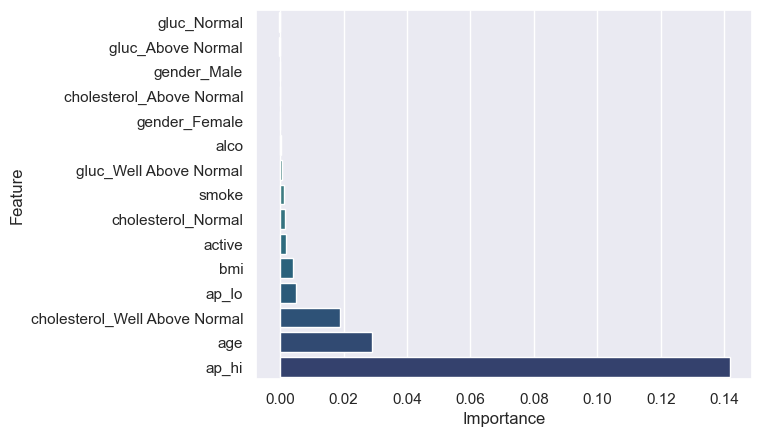

In [ ]:
gbt_result = permutation_importance(gbt, X_test, y_test, n_repeats=10, n_jobs=-1)
gbt_result = list(zip(gbt.feature_names_in_, gbt_result.importances_mean))
gbt_importance_table = pd.DataFrame(data=gbt_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=gbt_importance_table, x="Importance", y="Feature", palette="crest")

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

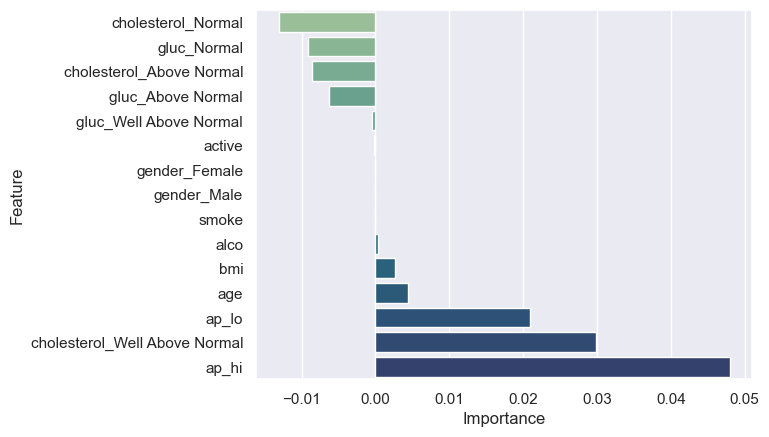

In [ ]:
gnb_result = permutation_importance(gnb, X_test, y_test, n_repeats=10, n_jobs=-1)
gnb_result = list(zip(gbt.feature_names_in_, gnb_result.importances_mean))
gnb_importance_table = pd.DataFrame(data=gnb_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=gnb_importance_table, x="Importance", y="Feature", palette="crest")

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

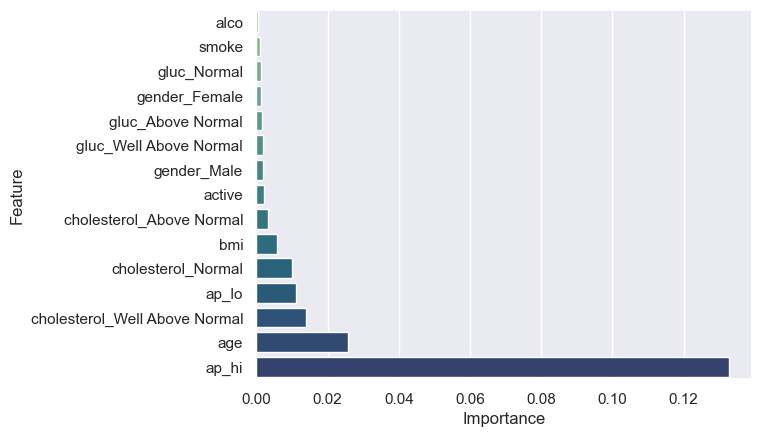

In [ ]:
nn_result = nn_result = permutation_importance(nn, X_test, y_test, n_repeats=10, n_jobs=-1)
nn_result = list(zip(gbt.feature_names_in_, nn_result.importances_mean))
nn_importance_table = pd.DataFrame(data=nn_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=nn_importance_table, x="Importance", y="Feature", palette="crest", orient='h')

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

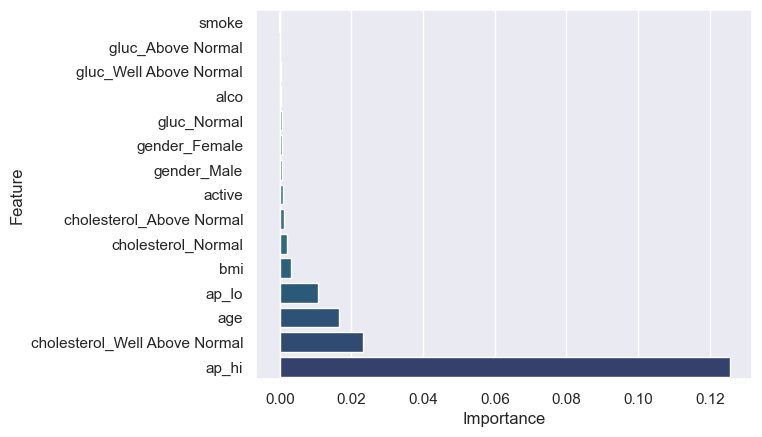

In [ ]:
svc_result = permutation_importance(svc, X_test, y_test, n_repeats=1, n_jobs=-1)
svc_result = list(zip(svc.feature_names_in_, svc_result.importances_mean))
svc_importance_table = pd.DataFrame(data=svc_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=nn_importance_table, x="Importance", y="Feature", palette="crest", orient='h')

In [4]:
model_accuracies = {
    "GradientBoostingClassifier": 73.52,
    "GaussianNB": 59.77, 
    "SVC": 73.41,
    "MLPClassifier": 73.24,
}

accuracy_sum = sum(model_accuracies.values())

model_weights = [(m, round(a * (1/accuracy_sum) * 100, 2)) for m, a in model_accuracies.items()]

model_weights_dict = {m: a * (1/accuracy_sum) for m, a in model_accuracies.items()}

model_weights.sort(key=lambda x: x[1])


weights_df = pd.DataFrame(data=[w[1] for w in model_weights], index=[w[0] for w in model_weights], columns=["Weights (%)"])

weights_df


,Weights (%)
GaussianNB,21.35
MLPClassifier,26.16
SVC,26.22
GradientBoostingClassifier,26.26


In [ ]:
model_accuracies_list = list(model_accuracies.items())
pd.DataFrame(data=[x[1] for x in model_accuracies_list], index=[x[0] for x in model_accuracies_list], columns=["Best Accuracy (%)"]).sort_values(by="Best Accuracy (%)")

,Best Accuracy (%)
GaussianNB,59.77
MLPClassifier,73.24
SVC,73.41
GradientBoostingClassifier,73.52


In [ ]:
importance_tables = {
    "GradientBoostingClassifier": gbt_importance_table,
    "GaussianNB": gnb_importance_table,
    "SVC": svc_importance_table,
    "MLPClassifier": nn_importance_table
}

weighted_average = { f: 0 for f in X_train.columns }
l = list(importance_tables["SVC"]["Feature"].values)
l.index("bmi")

# for m, table in importancce_tables:
    
#     ranking = 
#     model_weights[m] * 

10

In [ ]:
for m, table in importance_tables.items():
    ranking = list(table["Feature"].values)
    
    for feature in weighted_average.keys():
        weighted_average[feature] += model_weights_dict[m] * ranking.index(feature)
    
weighted_average 

{'age': 12.310745159677074,
 'bmi': 9.738372508394656,
 'ap_lo': 11.213510037865257,
 'ap_hi': 14.0,
 'gluc_Above Normal': 2.2119025505465455,
 'gluc_Normal': 1.7857040794455954,
 'gluc_Well Above Normal': 4.262413374294492,
 'gender_Female': 4.427627348717582,
 'gender_Male': 5.162999214117311,
 'cholesterol_Above Normal': 5.405801243123527,
 'cholesterol_Normal': 7.077409444881046,
 'cholesterol_Well Above Normal': 12.47574480245767,
 'smoke': 3.8081017360863045,
 'alco': 4.0214331642494825,
 'active': 7.098235336143459}

In [112]:
weighted_average_importance = { f: 0 for f in X_train.columns }

for m, table in importance_tables.items():
    feature_importance = dict(zip(table["Feature"].values, table["Importance"].values))
    
    for feature in weighted_average_importance.keys():
        weighted_average_importance[feature] += model_weights_dict[m] * feature_importance[feature]
    

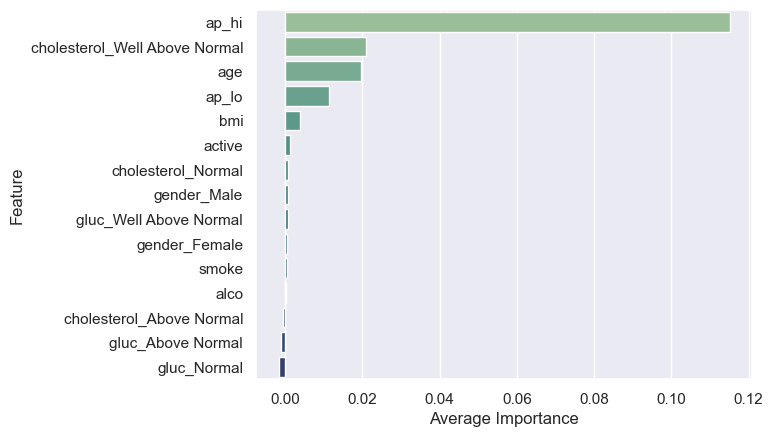

In [117]:
weighted_avg_importance_list = list(weighted_average_importance.items())
weighted_avg_importance_table = pd.DataFrame(data=weighted_avg_importance_list, columns=["Feature", "Average Importance"]).sort_values(by="Average Importance", ascending=False)

ax = sb.barplot(data=weighted_avg_importance_table, x="Average Importance", y="Feature", palette="crest")


In [ ]:
weighted_average_list = [(f, round(avg, 2)) for f, avg in weighted_average.items()]
weighted_average_table = pd.DataFrame(data=weighted_average_list, columns=["Feature", "Average Ranking"]).sort_values(by="Average Ranking", ignore_index=True, ascending=False)
weighted_average_table

,Feature,Average Ranking
0,ap_hi,14.00
1,cholesterol_Well Above Normal,12.48
2,age,12.31
3,ap_lo,11.21
4,bmi,9.74
5,active,7.10
6,cholesterol_Normal,7.08
7,cholesterol_Above Normal,5.41
8,gender_Male,5.16
9,gender_Female,4.43


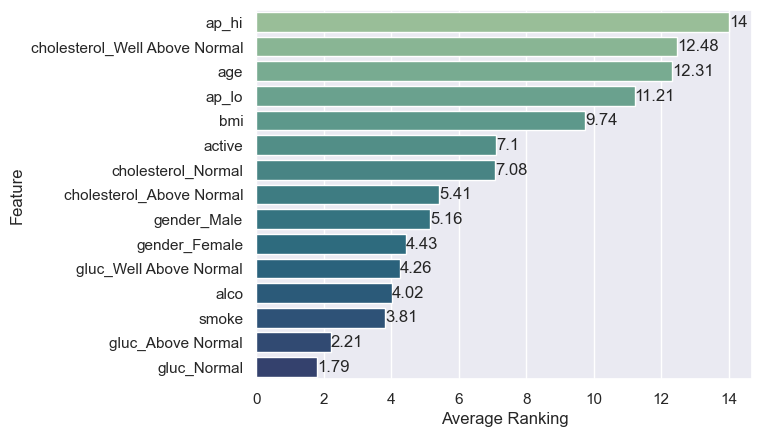

In [ ]:
ax = sb.barplot(data=weighted_average_table, x="Average Ranking", y="Feature", palette="crest")

for i in ax.containers:
    ax.bar_label(i,)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

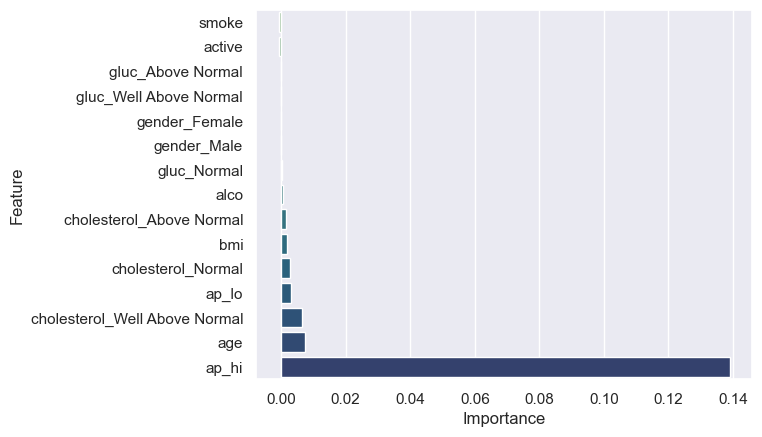

In [8]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

svc_result = permutation_importance(svc, X_test, y_test, n_repeats=1, n_jobs=-1)
svc_result = list(zip(svc.feature_names_in_, svc_result.importances_mean))
svc_importance_table = pd.DataFrame(data=svc_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=svc_importance_table, x="Importance", y="Feature", palette="crest", orient='h')

Test Accuracy 	: 0.7259420289855072


<AxesSubplot:>

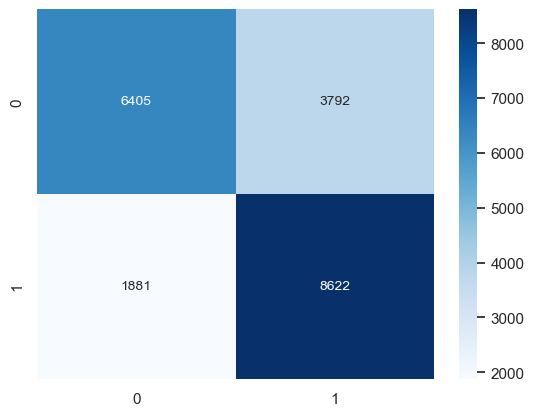

In [14]:
from sklearn.metrics import accuracy_score

y_pred_test_svc = svc.predict(X_test)

print("Test Accuracy \t:", accuracy_score(y_true=y_test, y_pred=y_pred_test_svc))
sb.heatmap(confusion_matrix(y_test, y_pred_test_svc), annot = True, fmt=".0f", annot_kws={"size": 10}, cmap="Blues")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

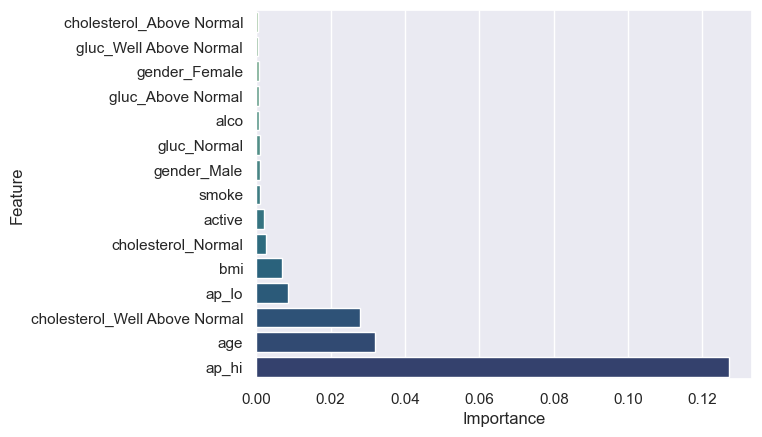

In [12]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train, y_train)

nn_result = permutation_importance(nn, X_test, y_test, n_repeats=10, n_jobs=-1)
nn_result = list(zip(nn.feature_names_in_, nn_result.importances_mean))
nn_importance_table = pd.DataFrame(data=nn_result, columns=["Feature", "Importance"]).sort_values(by="Importance", ignore_index=True)
sb.barplot(data=nn_importance_table, x="Importance", y="Feature", palette="crest", orient='h')

Test Accuracy 	: 0.7342512077294686


<AxesSubplot:>

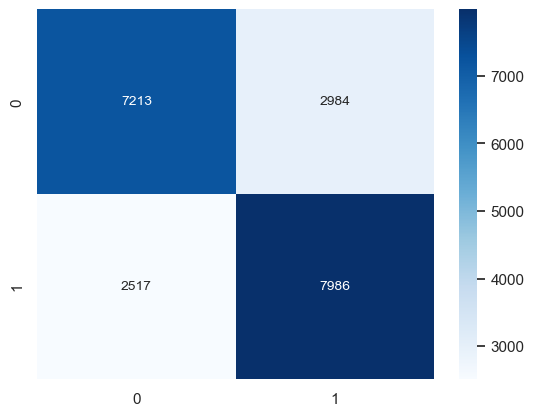

In [15]:
y_pred_test_nn = nn.predict(X_test)

print("Test Accuracy \t:", accuracy_score(y_true=y_test, y_pred=y_pred_test_nn))
sb.heatmap(confusion_matrix(y_test, y_pred_test_nn), annot = True, fmt=".0f", annot_kws={"size": 10}, cmap="Blues")